# Fig. 4: Frequency Dependence of Eigenmodes on External Field Strength

This notebook reproduces Fig. 4 in the paper, which shows the frequency dependence of first five eigenmodes on the strength of the external field.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm
from numpy import pi
from style_helpers import style_cycle

%matplotlib inline
plt.style.use('style_sheets/fig4.mplstyle')

In [2]:
df = pd.read_csv('../data/eigenmode_info_data_frame.csv')
df = df.query('has_particle == False')

The external field values used in the simulations are in units of A/m. We therefore add an additional column containing the values in mT.

In [3]:
# Define vacuum permeability (in V.s/A.m)
mu0 = 4 * pi * 1e-7

# Convert field values to milli-Tesla
df['Hz_mT'] = df['Hz'] * mu0 * 1e3

In [4]:
def plot_fitted_line(N, df, ax):
    """
    Return a `pandas.Series` containing the intercept and slope of
    a line fitted to the frequency data for the `N`-the eigenmode.
    """
    linefit = sm.ols(formula="freq ~ Hz_mT", data=df).fit()
    a = linefit.params.Intercept
    b = linefit.params.Hz_mT
    max_Hz = df['Hz_mT'].max()
    ax.plot([0, max_Hz], [a, a + max_Hz * b], '-k')

In [5]:
def plot_freq_vs_H_ext_for_mode(N, df, ax, **mpl_kwargs):
    df_filtered = df.query('N == {N}'.format(N=N)).sort_values('Hz_mT')

    Hz_mT = df_filtered['Hz_mT']
    freqs = df_filtered['freq']

    plot_fitted_line(N, df_filtered, ax)
    ax.plot(Hz_mT, freqs, label='N={N}'.format(N=N), **mpl_kwargs)

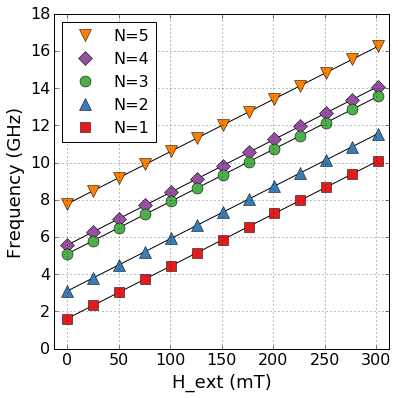

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))

# Plot lines in reverse order to avoid higher modes
# covering the lower ones.
for N, style_kwargs in reversed(list(zip([1, 2, 3, 4, 5], style_cycle))):
    plot_freq_vs_H_ext_for_mode(N, df, ax, linestyle='none', **style_kwargs)

ax.set_xlabel('H_ext (mT)')
ax.set_ylabel('Frequency (GHz)')
ax.set_xlim(-12.5, 312.5)
ax.legend(numpoints=1, loc='best', prop={'size': 16})
ax.grid()